In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


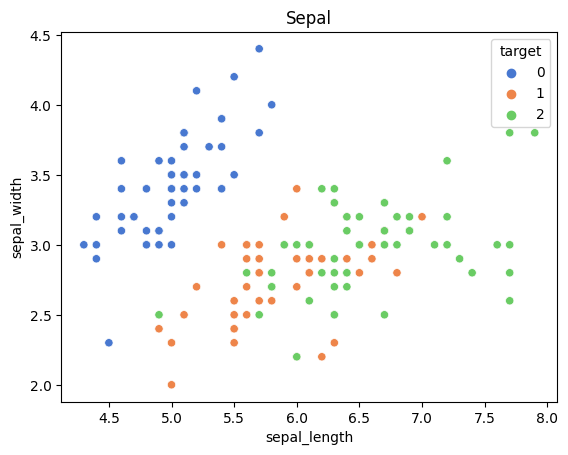

In [3]:
# 꽃받침 시각화
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.scatterplot(
  x='sepal_length',
  y='sepal_width',
  hue='target',
  palette='muted',
  data=irisDF
)

plt.title('Sepal')
plt.show()

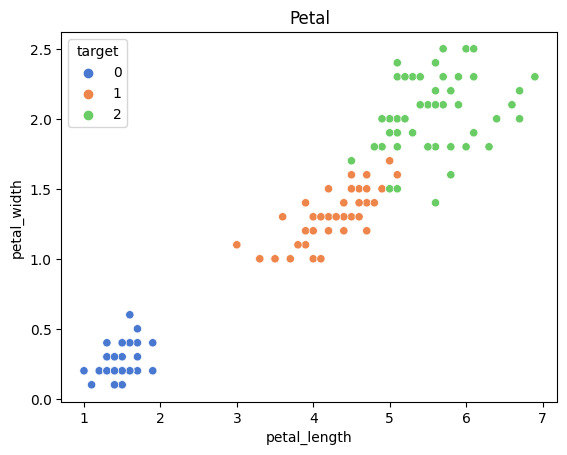

In [4]:
# 꽃잎 시각화

sns.scatterplot(
  x='petal_length',
  y='petal_width',
  hue='target',
  palette='muted',
  data=irisDF
)
plt.title('Petal')
plt.show()

## PCA로 차원 변환

In [5]:
# 4차원 데이터를 2차원으로 축소
from sklearn.decomposition import PCA

# n_componenets : 축소할 차원(주성분 개수). 분산이 가장 큰 벡터의 개수
pca_2 = PCA(n_components=2)

# PCA 객체에 데이터 입력
pca_2.fit(
  irisDF.drop('target', axis=1)
)

# 데이터 변환 수행 (데이터의 차원수가 변경되기 때문에 PCA에 Transformer)
iris_pca = pca_2.transform(irisDF.drop('target', axis=1))
iris_pca.shape

(150, 2)

In [6]:
# PCA로 변환된 데이터를 데이터프레임으로 만들기
pca_columns = ['Component 1', 'Component 2']
iris_pca_df = pd.DataFrame(
  iris_pca,
  columns=pca_columns
)

iris_pca_df['target'] = iris.target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


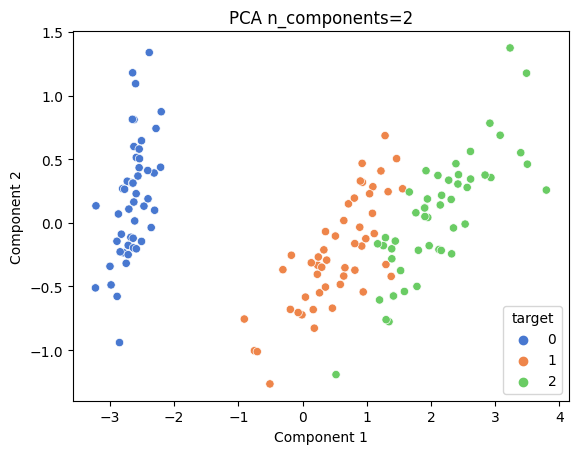

In [7]:
# PCA 컴포넌트 시각화

sns.scatterplot(
  x='Component 1',
  y='Component 2',
  hue='target',
  palette='muted',
  data=iris_pca_df
)
plt.title('PCA n_components=2')
plt.show()

In [8]:
# 4차원에서 3차원으로 차원축소 해보기
pca_3 = PCA(n_components=3)
iris_pca_3 = pca_3.fit_transform(irisDF.drop('target', axis=1))
iris_pca_3.shape

(150, 3)

In [9]:
# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_columns = ['Component 1', 'Component 2', 'Component 3']
iris_pca_df = pd.DataFrame(
  iris_pca_3,
  columns=pca_columns
)
iris_pca_df['target'] = iris.target
iris_pca_df.head()

,Component 1,Component 2,Component 3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


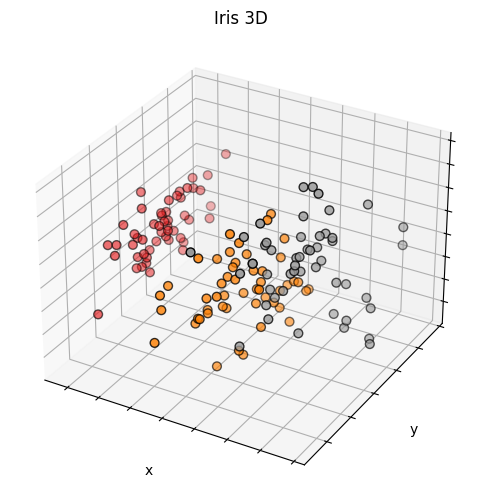

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(iris_pca_df['Component 1'],
           iris_pca_df['Component 2'],
           iris_pca_df['Component 3'],
           c=iris_pca_df['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title('Iris 3D')
ax.set_xlabel('x')
ax.w_xaxis.set_ticklabels([]) # x축 tick 사용하지 않기
ax.set_ylabel('y')
ax.w_yaxis.set_ticklabels([]) # y축 tick 사용하지 않기
ax.set_zlabel('z')
ax.w_zaxis.set_ticklabels([]) # z축 tick 사용하지 않기

plt.show()

## [실습]
1. PCA를 적용하지 않고 `RandomForestClassifier` 사용해서 Cross Validation
2. PCA를 적용하고(n_component=2) `Cross Validation`

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도: ',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [14]:
# 4차원 데이터를 2차원으로 축소
from sklearn.decomposition import PCA

# n_componenets : 축소할 차원(주성분 개수). 분산이 가장 큰 벡터의 개수
pca_2 = PCA(n_components=2)

# PCA 객체에 데이터 입력
pca_2.fit(irisDF.drop('target', axis=1))

# 데이터 변환 수행 (데이터의 차원수가 변경되기 때문에 PCA에 Transformer)
iris_pca = pca_2.transform(irisDF.drop('target', axis=1))

# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_columns = ['Component 1', 'Component 2']
iris_pca_df = pd.DataFrame(
  iris_pca,
  columns=pca_columns
)
iris_pca_df['target'] = iris.target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [15]:
rcf = RandomForestClassifier(random_state=156)

pca_X = iris_pca_df[['Component 1', 'Component 2']]
scores_pca = cross_val_score(rcf, pca_X, iris_pca_df['target'], scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도: ', scores_pca)
print('PCA 변환 데이터 평균 정확도: ', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.94 0.96 0.98]
PCA 변환 데이터 평균 정확도:  0.96


똑같음